In [2]:
#Reading the dataset
import pandas as pd
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
#Removing Serial Number column
df=df.iloc[:,1:]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
#Checking for number of null values column wise
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values

In [5]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

Number of universities according to rating

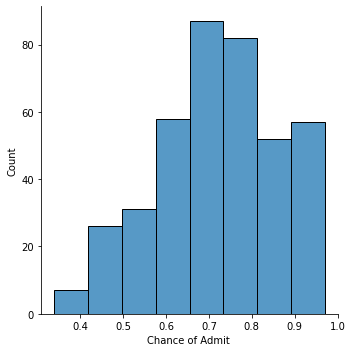

In [6]:
#Chance of Admit attribute is continuous so we will see its distribution using Seaborn Displot
#Displot is just like histogram but is univariate and bivariate
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df['Chance of Admit '],bins=8)
plt.show()

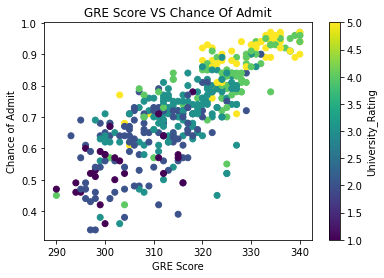

In [7]:
#Scatter plot for three vairable, the third variable is plotted by color range of University Rating
#GRE Score Vs Chance of Admit

color=df['University Rating']
plt.scatter(df['GRE Score'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score VS Chance Of Admit')
plt.show()

We can observe that as GRE Score and Chance of Admit increases, the University rating is also high, but there are some outliers

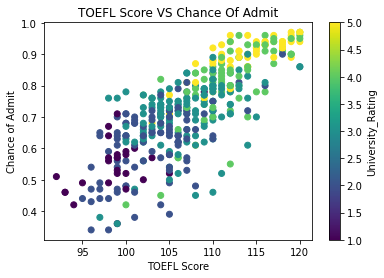

In [8]:
#TOEFL Score Vs Chance of Admit

color=df['University Rating']
plt.scatter(df['TOEFL Score'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score VS Chance Of Admit')
plt.show()

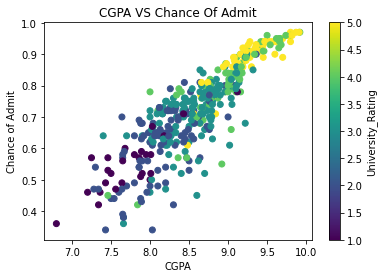

In [9]:
#CGPA Vs Chance of Admit

color=df['University Rating']
plt.scatter(df['CGPA'],df['Chance of Admit '],c=color)
cbar=plt.colorbar()
cbar.set_label('University_Rating')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA VS Chance Of Admit')
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

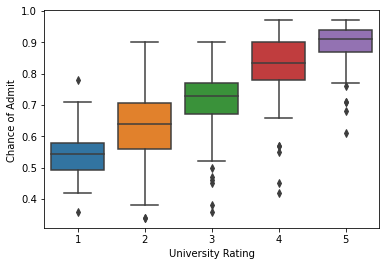

In [10]:
#Boxplot to find distribution of University Rating based on 5 number data
#The bottom line is minimum, the second line of the box is Q1(first quartile), the line inside the box
#is median and the line above median is Q3(third quartile) and the last line is maximum
#The circles outside of the box plot are outliers

#What does this boxplot say?
#We are seeing how the data is distributed (Chance of Admit probability (<=1)) attribute according to University Rating
#We can see that as Univeristy Rating is increasing the Chance of Admit probability also increases.

sns.boxplot(x='University Rating',y='Chance of Admit ',data=df)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

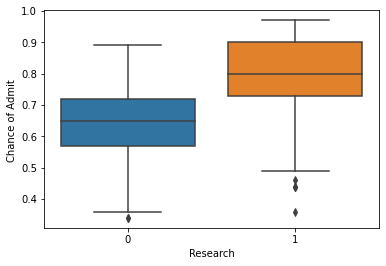

In [11]:
sns.boxplot(x='Research',y='Chance of Admit ',data=df)

We can see that chances of doing Research increased the chance of Admission

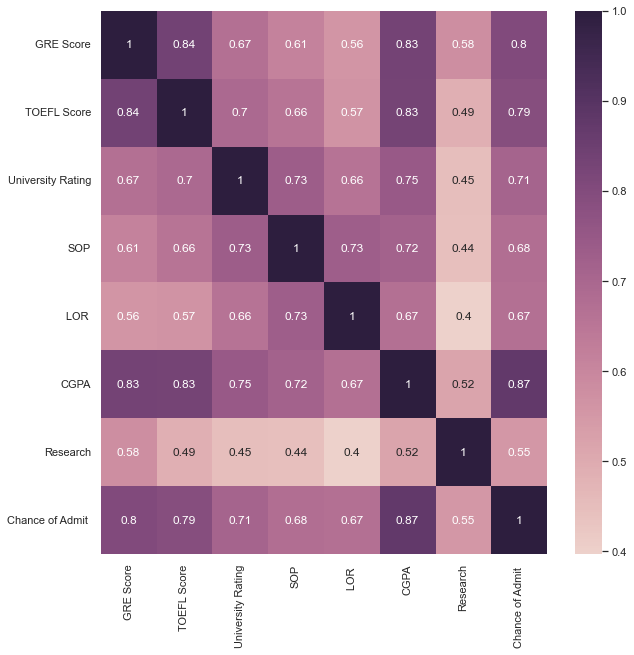

In [12]:
#Heatmap is a correlation matrix
#It is used to represent the common values, the darker the color, the more common the values are
#the corr() function selects the ideal (read: numerical) features for the plot.
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
plt.show()

#We can see the highest correlated value is 0.87 for Chance of Admit and CGPA.
#So, the chance of admit is highly dependent on cgpa of student
#Similarily, TOEFL score after CGPA is highly related to GRE Score

Correlation is a dimensionless unit that determines the degree to which variables are related.
It measures both strength and direction of the linear relationship between variables.
Its value lies between 0 and 1, depicting strength.
A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.

In [13]:
#Removing chance of admit as it is our output variable
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [14]:
#Extracting output variable
y=df['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [15]:
#We are dividing the dataset into training and testing partitions
#90% of data is training data and other 10% is testing data
x_trainn,x_test,y_trainn,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


In [17]:
print(x_trainn.shape,x_test.shape,y_trainn.shape,y_test.shape)

(360, 7) (40, 7) (360,) (40,)


In [18]:
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.1,random_state=42)

Validation Dataset: Portion of dataset used to evaluate and fine-tune machine learning models during the training process.
The validation data is used to evaluate the model's performance during training and make decisions about fine-tuning and validation data is crucial for preventing overfitting where the model performs well on training data but poorly on new and unseen data.
Validation dataset in extracted from training dataset.

In [19]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(324, 7) (36, 7) (40, 7) (324,) (36,) (40,)


In [20]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
import category_encoders as ce
#from ce import *
ce_target=ce.TargetEncoder(cols=['University Rating'])
x_train=ce_target.fit_transform(x_train,y_train) #reassigning training independent data
x_val=ce_target.transform(x_val) #validation data
x_test=ce_target.transform(x_test) #testing data

Category encoders are a type of data preprocessing technique used in machine learning for handling categorical features in datasets. They are designed to convert categorical data into numerical form, which can be easily used by machine learning algorithms.

Target encoding(Type of Bayesian encoding method) is the process of replacing a categorical value with the mean of the target variable. Any non-categorical columns are automatically dropped by the target encoder model. Note: You can also use target encoding to convert categorical columns to numeric.

In target encoding, each unique value is replaced by mean or median value of target variable for all instances in training data that have that value. This means that each category is assigned a single numeric value based on how it is related to target variable. This technique is useful for high-cardinality categorical variables, where number of unique categories is large.

One of the advantages of target encoding is that it can capture subtle relationships between categorical features and the target variable, which can be difficult to detect using other encoding methods. However, it is important to use cross-validation to prevent overfitting, as target encoding uses information about the target variable to create the encoding. Overfitting can occur if the encoding is too closely tailored to the training data and does not generalize well to new data.

We call fit_transform() method on our training data and transform() method on our test data.

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.
The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.

In [21]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
255,307,110,0.805767,4.0,4.5,8.37,0
121,334,119,0.875795,4.5,4.5,9.48,1
119,327,104,0.875795,3.0,3.5,8.84,1
311,328,108,0.805767,4.5,4.0,9.18,1
362,338,115,0.875795,4.5,5.0,9.23,1
...,...,...,...,...,...,...,...
387,307,105,0.633733,2.0,3.5,8.10,0
59,311,104,0.633733,2.0,2.0,8.30,0
14,311,104,0.721870,3.5,2.0,8.20,1
87,317,107,0.633733,3.5,3.0,8.28,0


We are using a target encoder as it creates a single column for each categorical variable instead of creating a column for each level of the categorical variable like one-hot-encoding. This makes interpreting the impact of categorical variables with feature impact easier.

In [22]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,0.721870,3.5,4.0,8.12,1
280,311,102,0.721870,4.5,4.0,8.64,1
33,340,114,0.875795,4.0,4.0,9.60,1
210,325,108,0.805767,4.5,4.0,9.06,1
93,301,97,0.633733,3.0,3.0,7.88,1
84,340,115,0.875795,4.5,4.5,9.45,1
329,297,96,0.633733,2.5,1.5,7.89,0
94,303,99,0.721870,2.0,2.5,7.66,0
266,312,105,0.633733,2.0,2.5,8.45,0
126,323,113,0.721870,4.0,3.0,9.32,1


In [23]:
x_val

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
170,312,101,0.633733,2.5,3.5,8.04,1
202,340,120,0.875795,4.5,4.5,9.91,1
365,330,114,0.805767,4.5,3.0,9.17,1
263,324,111,0.721870,2.5,1.5,8.79,1
373,321,109,0.721870,3.0,3.0,8.54,1
40,308,110,0.721870,3.5,3.0,8.00,1
39,307,108,0.633733,4.0,3.5,7.70,0
380,322,104,0.721870,3.5,4.0,8.84,1
98,332,119,0.805767,5.0,4.5,9.24,1
353,300,102,0.721870,3.5,2.5,8.17,0


In [24]:
#Standardization of features
cols=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
d={}
for i in cols:
    mean_i=x_train[i].mean()
    std_i=x_train[i].std()
    x_train[i]=(x_train[i]-mean_i)/std_i
    d[i]=[mean_i,std_i]
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
255,-0.900802,0.424716,0.805767,0.610183,1.157610,-0.387460,0
121,1.538138,1.922264,0.875795,1.111958,1.157610,1.516436,1
119,0.905820,-0.573649,0.875795,-0.393367,0.036338,0.418694,1
311,0.996151,0.091928,0.805767,1.111958,0.596974,1.001869,1
362,1.899462,1.256687,0.875795,1.111958,1.718246,1.087630,1
...,...,...,...,...,...,...,...
387,-0.900802,-0.407255,0.633733,-1.396916,0.036338,-0.850570,0
59,-0.539477,-0.573649,0.633733,-1.396916,-1.645571,-0.507526,0
14,-0.539477,-0.573649,0.721870,0.108408,-1.645571,-0.679048,1
87,0.002509,-0.074467,0.633733,0.108408,-0.524298,-0.541830,0


In [25]:
for i in cols:
  x_val[i]=(x_val[i]-d[i][0])/d[i][1]
  x_test[i]=(x_test[i]-d[i][0])/d[i][1]
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,-1.442788,-0.573649,0.721870,0.108408,0.596974,-0.816265,1
280,-0.539477,-0.906438,0.721870,1.111958,0.596974,0.075650,1
33,2.080125,1.090293,0.875795,0.610183,0.596974,1.722262,1
210,0.725158,0.091928,0.805767,1.111958,0.596974,0.796043,1
93,-1.442788,-1.738409,0.633733,-0.393367,-0.524298,-1.227919,1
84,2.080125,1.256687,0.875795,1.111958,1.157610,1.464979,1
329,-1.804113,-1.904803,0.633733,-0.895141,-2.206207,-1.210766,0
94,-1.262126,-1.405620,0.721870,-1.396916,-1.084935,-1.605267,0
266,-0.449146,-0.407255,0.633733,-1.396916,-1.084935,-0.250242,0
126,0.544496,0.923899,0.721870,0.610183,-0.524298,1.242000,1


Why do we standardize the features?

1. Scaling: Standardization scales the features to a common range, which makes it easier to compare them. If the features have different scales, one feature may dominate the analysis, and the results may be biased towards that feature.

2. Normalization: Standardization can transform the features to a normal distribution, which is often a requirement for certain statistical techniques, such as linear regression, logistic regression, and many machine learning algorithms.

3. Outlier Treatment: Standardization reduces the effect of outliers by scaling the data to a common range. Outliers, which are values that are much larger or smaller than the typical values in the dataset, can have a significant impact on the analysis if they are not properly handled.

4. Convergence: Standardization can help algorithms converge faster during optimization. Some optimization algorithms, such as gradient descent, work better when the data is scaled to a common range.

Overall, standardizing features is an important step in preparing data for statistical analysis and machine learning. It helps to ensure that the results are accurate and unbiased, and that the algorithms used to analyze the data perform optimally.

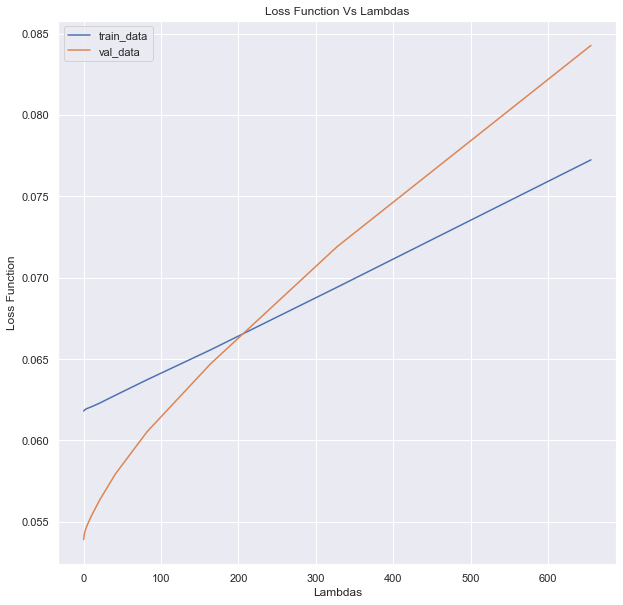

In [26]:
#Performing Linear Regression
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
c=0.01
alphas=[]
train_cost=[]
val_cost=[]
while c<=1000:
    ridge=Ridge(alpha=c)
    ridge.fit(x_train,y_train)
    y_hat=ridge.predict(x_train)
    y_pred=ridge.predict(x_val)
    tr_cost=np.sqrt(mean_squared_error(y_train,y_hat))
    vl_cost=np.sqrt(mean_squared_error(y_val,y_pred))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    alphas.append(c)
    c*=2
plt.plot(alphas,train_cost,label='train_data')
plt.plot(alphas,val_cost,label='val_data')
plt.xlabel('Lambdas')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Lambdas')
plt.legend()
plt.show()

In linear regression, the loss function is used to measure the difference between the predicted values and the actual values of the target variable. The goal of linear regression is to find the set of coefficients that minimize the loss function, which is typically defined as the sum of squared errors between the predicted values and the actual values.

The most commonly used loss function in linear regression is the Mean Squared Error (MSE) loss function. 

Lambdas, or regularization parameters, are used in linear regression to prevent overfitting by penalizing large coefficients. Regularization adds a penalty term to the loss function, which encourages the model to select coefficients that are smaller in magnitude.


In [27]:
#Finding the Lambda best
z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

0.01

In [28]:
#Performing Linear Regression for lambda best
ridge=Ridge(alpha=lbest)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [29]:
ridge.score(x_train,y_train) 

0.7933653912577866

In [30]:
ridge.score(x_test,y_test)

0.7686948570405777

In [31]:

ridge.score(x_val,y_val)

0.8869767339718083

### Checking VIF scores

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
X_t = x_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
     

,Features,VIF
5,CGPA,4.81
0,GRE Score,4.18
1,TOEFL Score,3.91
6,Research,3.24
2,University Rating,2.81
3,SOP,2.73
4,LOR,2.38


A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.

### Residual Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


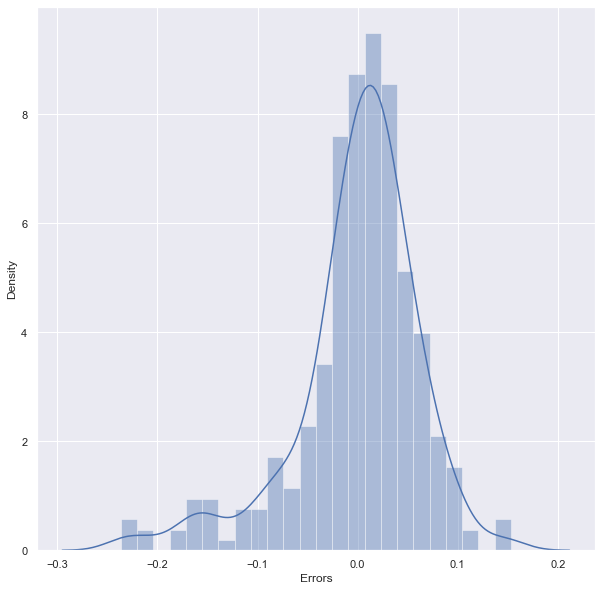

In [34]:
pred=ridge.predict(x_train)
errors=y_train-pred
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

### Checking for Heteroscedascity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'erros')

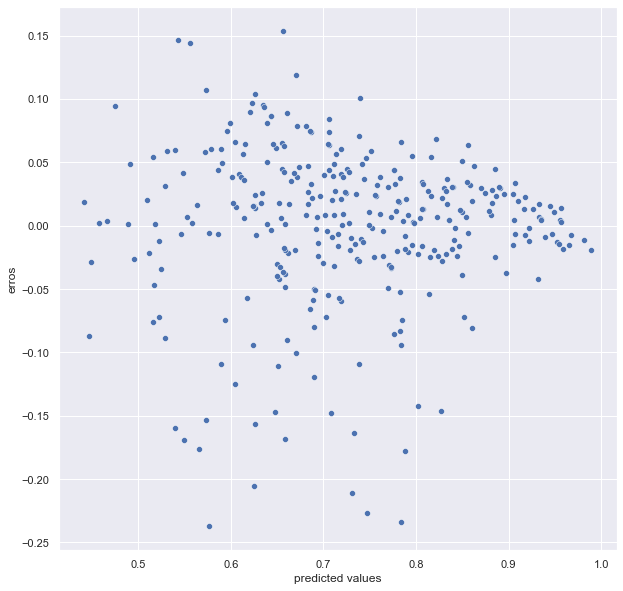

In [35]:
sns.scatterplot(pred,errors )
plt.xlabel('predicted values')
plt.ylabel('erros')

Heteroskedasticity refers to situations where the variance of the residuals is unequal over a range of measured values. When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals (also known as the error term).

In [36]:
x_train['errors']=errors

In [37]:
x_train=pd.concat([x_train,y_train],axis=1)
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,errors,Chance of Admit
255,-0.900802,0.424716,0.805767,0.610183,1.157610,-0.387460,0,0.084478,0.79
121,1.538138,1.922264,0.875795,1.111958,1.157610,1.516436,1,0.007019,0.94
119,0.905820,-0.573649,0.875795,-0.393367,0.036338,0.418694,1,-0.074715,0.71
311,0.996151,0.091928,0.805767,1.111958,0.596974,1.001869,1,-0.001673,0.84
362,1.899462,1.256687,0.875795,1.111958,1.718246,1.087630,1,0.004726,0.91
...,...,...,...,...,...,...,...,...,...
387,-0.900802,-0.407255,0.633733,-1.396916,0.036338,-0.850570,0,-0.093928,0.53
59,-0.539477,-0.573649,0.633733,-1.396916,-1.645571,-0.507526,0,-0.205487,0.42
14,-0.539477,-0.573649,0.721870,0.108408,-1.645571,-0.679048,1,-0.039756,0.61
87,0.002509,-0.074467,0.633733,0.108408,-0.524298,-0.541830,0,0.001192,0.66


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='errors', ylabel='Density'>

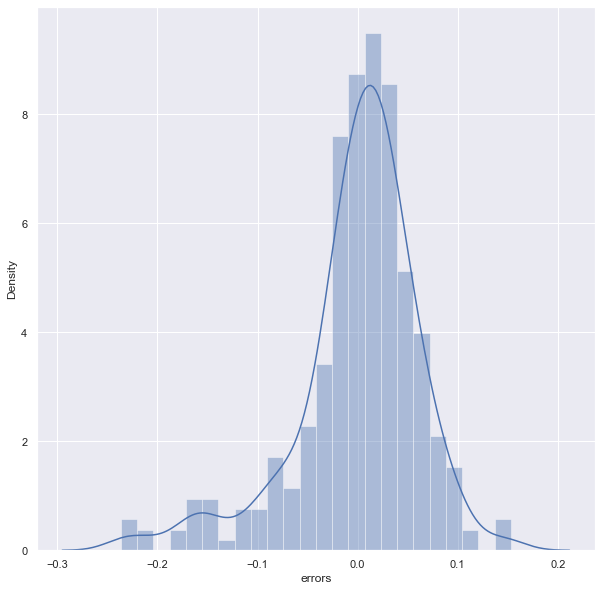

In [38]:
sns.distplot(x_train['errors'])

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. A distplot plots a univariate distribution of observations. 

### Removing the Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='errors', ylabel='Density'>

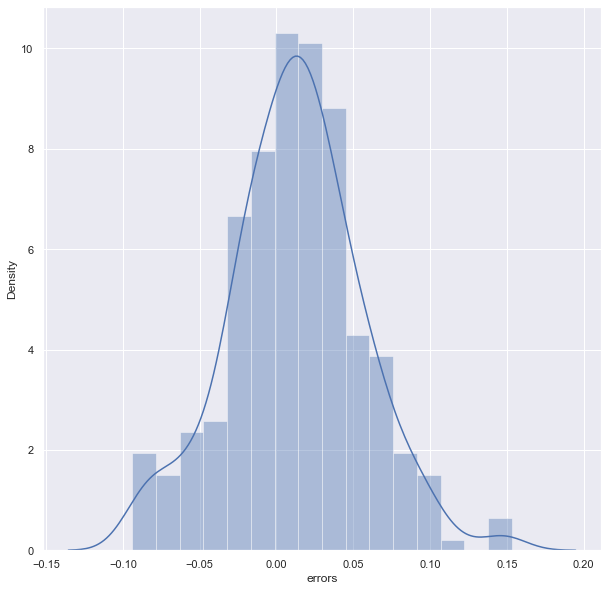

In [39]:
x_train1=x_train[(x_train['errors']>=-0.1)&(x_train['errors']<=0.16)]
sns.distplot(x_train1['errors'])

In [40]:
x_train1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,errors,Chance of Admit
255,-0.900802,0.424716,0.805767,0.610183,1.157610,-0.387460,0,0.084478,0.79
121,1.538138,1.922264,0.875795,1.111958,1.157610,1.516436,1,0.007019,0.94
119,0.905820,-0.573649,0.875795,-0.393367,0.036338,0.418694,1,-0.074715,0.71
311,0.996151,0.091928,0.805767,1.111958,0.596974,1.001869,1,-0.001673,0.84
362,1.899462,1.256687,0.875795,1.111958,1.718246,1.087630,1,0.004726,0.91
...,...,...,...,...,...,...,...,...,...
2,-0.087822,-0.573649,0.721870,-0.393367,0.036338,-1.022092,1,0.063049,0.72
387,-0.900802,-0.407255,0.633733,-1.396916,0.036338,-0.850570,0,-0.093928,0.53
14,-0.539477,-0.573649,0.721870,0.108408,-1.645571,-0.679048,1,-0.039756,0.61
87,0.002509,-0.074467,0.633733,0.108408,-0.524298,-0.541830,0,0.001192,0.66


In [41]:
y_train1=x_train1['Chance of Admit ']
y_train1

255    0.79
121    0.94
119    0.71
311    0.84
362    0.91
       ... 
2      0.72
387    0.53
14     0.61
87     0.66
291    0.56
Name: Chance of Admit , Length: 301, dtype: float64

In [42]:
x_train1=x_train1.drop(['errors', 'Chance of Admit '],axis=1)
x_train1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
255,-0.900802,0.424716,0.805767,0.610183,1.157610,-0.387460,0
121,1.538138,1.922264,0.875795,1.111958,1.157610,1.516436,1
119,0.905820,-0.573649,0.875795,-0.393367,0.036338,0.418694,1
311,0.996151,0.091928,0.805767,1.111958,0.596974,1.001869,1
362,1.899462,1.256687,0.875795,1.111958,1.718246,1.087630,1
...,...,...,...,...,...,...,...
2,-0.087822,-0.573649,0.721870,-0.393367,0.036338,-1.022092,1
387,-0.900802,-0.407255,0.633733,-1.396916,0.036338,-0.850570,0
14,-0.539477,-0.573649,0.721870,0.108408,-1.645571,-0.679048,1
87,0.002509,-0.074467,0.633733,0.108408,-0.524298,-0.541830,0


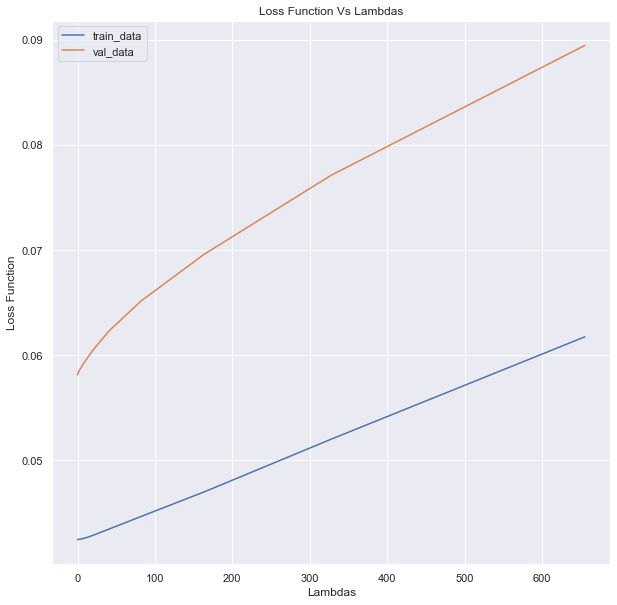

In [43]:
c=0.01
alphas=[]
train_cost=[]
val_cost=[]
while c<=1000:
    ridge=Ridge(alpha=c)
    ridge.fit(x_train1,y_train1)
    y_hat=ridge.predict(x_train1)
    y_pred=ridge.predict(x_val)
    tr_cost=np.sqrt(mean_squared_error(y_train1,y_hat))
    vl_cost=np.sqrt(mean_squared_error(y_val,y_pred))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    alphas.append(c)
    c*=2
plt.plot(alphas,train_cost,label='train_data')
plt.plot(alphas,val_cost,label='val_data')
plt.xlabel('Lambdas')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Lambdas')
plt.legend()
plt.show()

### Finding the lambda best

In [44]:

z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

0.01

### Perorming Linear Regression on lambda best

In [45]:
ridge=Ridge(alpha=lbest)
ridge.fit(x_train1,y_train1)

Ridge(alpha=0.01)

In [46]:
ridge.score(x_train1,y_train1)

0.8827654632916321

In [47]:
ridge.score(x_test,y_test)

0.7188813264904287

In [48]:

ridge.score(x_val,y_val)

0.868608012138589

In [49]:

vif = pd.DataFrame()
X_t = x_train1
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.87
0,GRE Score,4.29
1,TOEFL Score,3.89
6,Research,3.44
2,University Rating,2.93
3,SOP,2.93
4,LOR,2.36


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


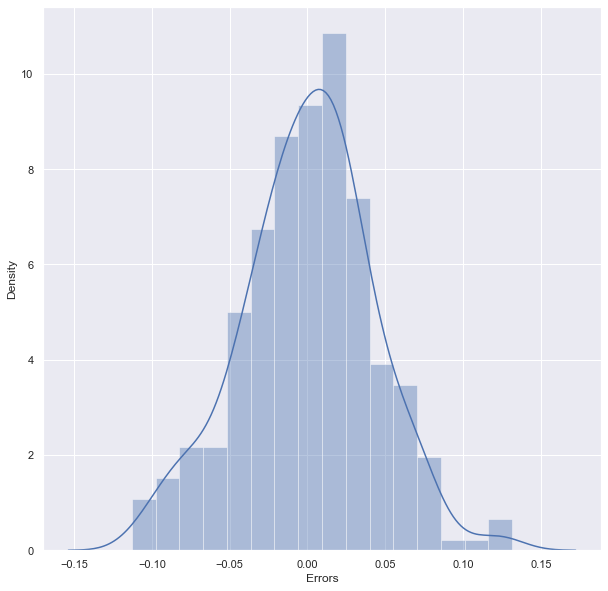

In [50]:

pred=ridge.predict(x_train1)
errors=y_train1-pred
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'erros')

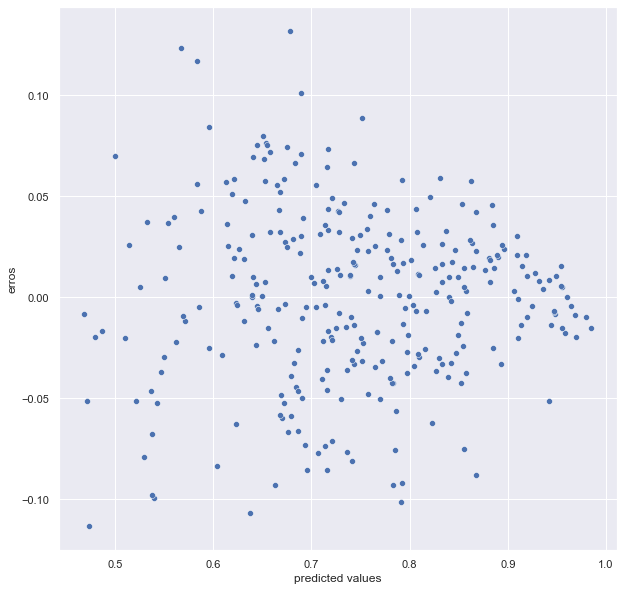

In [51]:
sns.scatterplot(pred,errors )
plt.xlabel('predicted values')
plt.ylabel('erros')

### Decision Tree Regressor

In [52]:
X=df.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [53]:
Y=df['Chance of Admit ']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [54]:
x_trainn,x_test,y_trainn,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.1,random_state=42)

In [55]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(324, 7) (36, 7) (40, 7) (324,) (36,) (40,)


In [56]:
ce_target=ce.TargetEncoder(cols=['University Rating'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

In [57]:

x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,0.721870,3.5,4.0,8.12,1
280,311,102,0.721870,4.5,4.0,8.64,1
33,340,114,0.875795,4.0,4.0,9.60,1
210,325,108,0.805767,4.5,4.0,9.06,1
93,301,97,0.633733,3.0,3.0,7.88,1
84,340,115,0.875795,4.5,4.5,9.45,1
329,297,96,0.633733,2.5,1.5,7.89,0
94,303,99,0.721870,2.0,2.5,7.66,0
266,312,105,0.633733,2.0,2.5,8.45,0
126,323,113,0.721870,4.0,3.0,9.32,1


In [58]:
from sklearn.tree import DecisionTreeRegressor

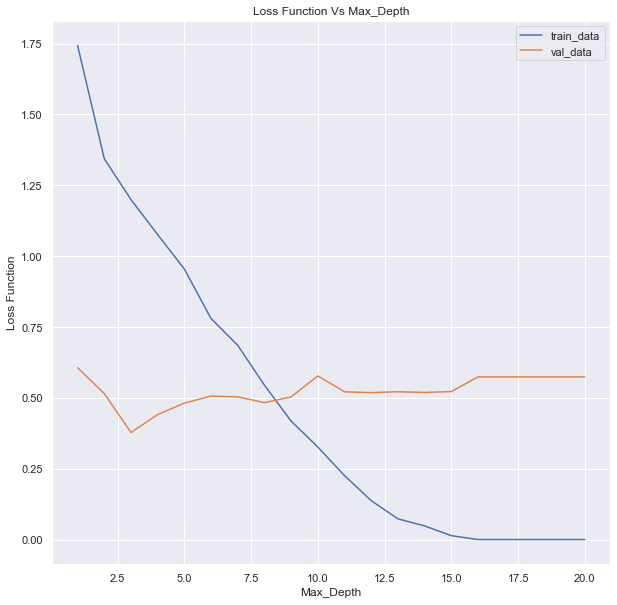

In [59]:
train_cost=[]
val_cost=[]
depth=1
maxdepth=[]
while depth<=20:
    reg=DecisionTreeRegressor(random_state=0,max_depth=depth)
    reg.fit(x_train,y_train)
    y_hat=reg.predict(x_train)
    y_pred=reg.predict(x_val)
    tr_cost=np.sqrt(np.sum((y_train-y_hat)**2))
    vl_cost=np.sqrt(np.sum((y_val-y_pred)**2))
    train_cost.append(tr_cost)
    val_cost.append(vl_cost)
    maxdepth.append(depth)
    depth+=1
plt.plot(maxdepth,train_cost,label='train_data')
plt.plot(maxdepth,val_cost,label='val_data')
plt.xlabel('Max_Depth')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Max_Depth')
plt.legend()
plt.show()

In [60]:
z=np.argmin(val_cost)
depth_best=z+1
     

In [61]:
reg=DecisionTreeRegressor(random_state=0,max_depth=depth_best)
reg.fit(x_train,y_train)
     

DecisionTreeRegressor(max_depth=3, random_state=0)

In [62]:

reg.score(x_train,y_train)

0.7597437335885288

In [63]:

reg.score(x_test,y_test)

0.720831628672297

In [64]:
reg.score(x_val,y_val)
     

0.8457872689988271

### Performing Ensemble Models

#### 1) BaggingRegressor

In [65]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [66]:
Y=df['Chance of Admit ']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [68]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(340, 7) (340,) (60, 7) (60,)


In [69]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_validate
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
rf_model=RandomForestRegressor(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[25,50],
        'max_depth':[5,8,12,15,20],
        'max_samples':[0.60,0.80,1],
        'max_features':[0.60,0.80,1]}

In [70]:
reg=GridSearchCV(rf_model,params,cv=fold,n_jobs=-1)

In [71]:
reg.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12, 15, 20],
                         'max_features': [0.6, 0.8, 1],
                         'max_samples': [0.6, 0.8, 1],
                         'n_estimators': [25, 50]})

In [72]:
reg.best_estimator_

RandomForestRegressor(max_depth=5, max_features=0.6, max_samples=0.6,
                      n_estimators=50, random_state=1)

In [73]:

df=pd.DataFrame(reg.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076363,0.012415,0.009962,2.784431e-03,5,0.6,0.6,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.731808,0.669780,0.799536,0.787686,0.835504,0.764863,0.058046,3
1,0.152687,0.012690,0.013400,2.726869e-03,5,0.6,0.6,50,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.747668,0.665018,0.795219,0.781122,0.841241,0.766054,0.058783,1
2,0.071271,0.007951,0.007483,4.485714e-04,5,0.6,0.8,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.754005,0.658653,0.799615,0.756910,0.840658,0.761968,0.060617,9
3,0.155603,0.005082,0.012197,1.723737e-03,5,0.6,0.8,50,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",0.756028,0.658183,0.798084,0.748906,0.847346,0.761709,0.062563,10
4,0.069570,0.005914,0.009198,1.941286e-03,5,0.6,1,25,"{'max_depth': 5, 'max_features': 0.6, 'max_sam...",-0.221932,-0.114837,-0.019556,-0.132170,-0.009166,-0.099532,0.078541,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.112399,0.003441,0.010800,7.481882e-04,20,1,0.6,50,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.782653,0.659743,0.770718,0.754350,0.817930,0.757079,0.052961,23
86,0.059997,0.001093,0.007000,6.217196e-07,20,1,0.8,25,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.769393,0.635420,0.760576,0.731557,0.796460,0.738681,0.055632,60
87,0.112860,0.004456,0.010370,2.398450e-03,20,1,0.8,50,"{'max_depth': 20, 'max_features': 1, 'max_samp...",0.777799,0.663957,0.785166,0.736313,0.818053,0.756258,0.052982,24
88,0.051800,0.002040,0.006400,4.898236e-04,20,1,1,25,"{'max_depth': 20, 'max_features': 1, 'max_samp...",-0.221932,-0.114837,-0.019556,-0.132170,-0.009166,-0.099532,0.078541,61


In [74]:
df.columns
     

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_samples',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [75]:
df1=df[['param_max_depth', 'param_max_features', 'param_max_samples', 'param_n_estimators','mean_test_score']]
df1.sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_max_features,param_max_samples,param_n_estimators,mean_test_score
1,5,0.6,0.6,50,0.766054
19,8,0.6,0.6,50,0.765467
0,5,0.6,0.6,25,0.764863
72,20,0.6,0.6,25,0.764689
18,8,0.6,0.6,25,0.763641
...,...,...,...,...,...
17,5,1,1,50,-0.104786
65,15,0.8,1,50,-0.104786
23,8,0.6,1,50,-0.104786
71,15,1,1,50,-0.104786


In [76]:
reg=RandomForestRegressor(n_estimators=50,max_depth=5,max_features=0.6,max_samples=0.8,n_jobs=-1,random_state=1)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=0.6, max_samples=0.8,
                      n_estimators=50, n_jobs=-1, random_state=1)

In [77]:
reg.score(x_train,y_train)

0.8725968503160413

In [78]:
reg.score(x_test,y_test)

0.8145490226137879

#### 2) BoostingRegressor

In [79]:
#import sys
#!{sys.executable} -m pip install xgboost

In [80]:
from xgboost import XGBRegressor

xgb_model=XGBRegressor(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[25,50],
        'eta':[0.1,0.5,0.8],
        'max_depth':[2,3,4,5],
        'sub_sample':[0.60,0.80,1],
        'colsample_bytree':[0.60,0.80,1]}

In [81]:

reg=GridSearchCV(xgb_model,params,cv=fold,n_jobs=-1)

In [82]:
reg.fit(x_train,y_train)

[22:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    i...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                         

In [83]:
reg.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [84]:
df2=pd.DataFrame(reg.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_eta,param_max_depth,param_n_estimators,param_sub_sample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.190636,0.049000,0.004331,0.000721,0.6,0.1,2,25,0.6,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.724618,0.638715,0.738863,0.739442,0.794895,0.727306,0.050408,76
1,0.165544,0.122140,0.004199,0.000749,0.6,0.1,2,25,0.8,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.724618,0.638715,0.738863,0.739442,0.794895,0.727306,0.050408,76
2,0.015999,0.001537,0.003636,0.000957,0.6,0.1,2,25,1,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.724618,0.638715,0.738863,0.739442,0.794895,0.727306,0.050408,76
3,0.033367,0.003834,0.004012,0.000023,0.6,0.1,2,50,0.6,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.748789,0.644866,0.779500,0.760036,0.840263,0.754691,0.063345,16
4,0.031600,0.001856,0.003799,0.000399,0.6,0.1,2,50,0.8,"{'colsample_bytree': 0.6, 'eta': 0.1, 'max_dep...",0.748789,0.644866,0.779500,0.760036,0.840263,0.754691,0.063345,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.029399,0.003611,0.003969,0.000636,1,0.8,5,25,0.8,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.538297,0.409856,0.653603,0.674193,0.648729,0.584936,0.099579,214
212,0.030642,0.002999,0.003902,0.000466,1,0.8,5,25,1,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.538297,0.409856,0.653603,0.674193,0.648729,0.584936,0.099579,214
213,0.042800,0.003543,0.003633,0.000795,1,0.8,5,50,0.6,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.543652,0.401289,0.658309,0.677078,0.648935,0.585852,0.103340,211
214,0.042844,0.000705,0.003792,0.000416,1,0.8,5,50,0.8,"{'colsample_bytree': 1, 'eta': 0.8, 'max_depth...",0.543652,0.401289,0.658309,0.677078,0.648935,0.585852,0.103340,211


In [85]:
df2.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_eta', 'param_max_depth',
       'param_n_estimators', 'param_sub_sample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [86]:
df3=df2[['param_max_depth','param_colsample_bytree', 'param_eta','param_n_estimators', 'param_sub_sample','mean_test_score']]
df3.sort_values(by='mean_test_score',ascending=False)

,param_max_depth,param_colsample_bytree,param_eta,param_n_estimators,param_sub_sample,mean_test_score
10,3,0.6,0.1,50,0.8,0.760709
11,3,0.6,0.1,50,1,0.760709
9,3,0.6,0.1,50,0.6,0.760709
83,3,0.8,0.1,50,1,0.757660
82,3,0.8,0.1,50,0.8,0.757660
...,...,...,...,...,...,...
214,5,1,0.8,50,0.8,0.585852
215,5,1,0.8,50,1,0.585852
210,5,1,0.8,25,0.6,0.584936
211,5,1,0.8,25,0.8,0.584936


In [87]:
reg=XGBRegressor(n_estimators=50,max_depth=3,colsample_bytree=0.8,sub_samples=0.8,eta=0.1,n_jobs=-1,random_state=1)
reg.fit(x_train,y_train)

[22:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "sub_samples" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=-1,
             num_parallel_tree=None, predictor=None, ...)

In [88]:
reg.score(x_train,y_train)

0.8714528436368644

In [89]:
reg.score(x_test,y_test)

0.8221827801295807